In [99]:
import os, time
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [100]:
#path of the pokemon data
PATH = '/Kaggle/MedicalClassification/MedicalTrainingData/'
TESTPATH = '/Kaggle/MedicalClassification/MedicalTestingData/'

#rescaling the image's size
img_width = 64
img_height = 64

#batch of the image data generatoor
batch_size = 32

#image 64*64
img_shape=(64,64,2)

#classes as the directories
classes = os.listdir(PATH)


In [135]:
#normalized each pixel by dividing with the total no of pixels
#sheer range - image is distorted along an axis so that computers can see how humans see from different angles
#zoom range - 80% zoom in and 120% zoom out
TRAIN_DATAGENR = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

TEST_DATAGENR = ImageDataGenerator(rescale = 1./255)

#training data
train_data_generator = TRAIN_DATAGENR.flow_from_directory(PATH,target_size=(img_width,img_height),batch_size=batch_size, subset='training')

#validation data
validation_data_generator = TRAIN_DATAGENR.flow_from_directory(PATH,target_size=(img_width,img_height),batch_size=batch_size, subset='validation')

#test data
test_data_generator = TEST_DATAGENR.flow_from_directory(TESTPATH,target_size=(img_width,img_height),batch_size=batch_size, shuffle=False)


Found 40195 images belonging to 6 classes.
Found 10047 images belonging to 6 classes.
Found 8712 images belonging to 6 classes.


In [136]:
#Definiing the model for our dataset 
model = keras.Sequential()

model.add(layers.Conv2D(32, 3, strides=(2,2), padding="same", activation='relu'))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(64, 3, strides=(2,2), padding="same", activation='relu'))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(64, 3, strides=(2,2), padding="same", activation='relu'))
model.add(layers.MaxPool2D())

model.add(layers.Flatten())

model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(classes), activation='softmax'))

# opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
             optimizer='adam',
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy']
             )

hist = model.fit_generator(train_data_generator, epochs=3, validation_data=validation_data_generator)



Epoch 1/3
1257/1257 [==============================] - 76s 61ms/step - loss: 0.0939 - accuracy: 0.8993 - val_loss: 0.0141 - val_accuracy: 0.9969
Epoch 2/3
1257/1257 [==============================] - 67s 54ms/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0139 - val_accuracy: 0.9972
Epoch 3/3
1257/1257 [==============================] - 68s 54ms/step - loss: 0.0095 - accuracy: 0.9964 - val_loss: 0.0162 - val_accuracy: 0.9961


{'loss': [0.09394553494885008, 0.016511610496586455, 0.009490362705849966], 'accuracy': [0.9682299, 0.99502426, 0.99691504], 'val_loss': [0.014122019375805208, 0.013876169839943704, 0.016223095096509845], 'val_accuracy': [0.9969145, 0.9972131, 0.99611825]}


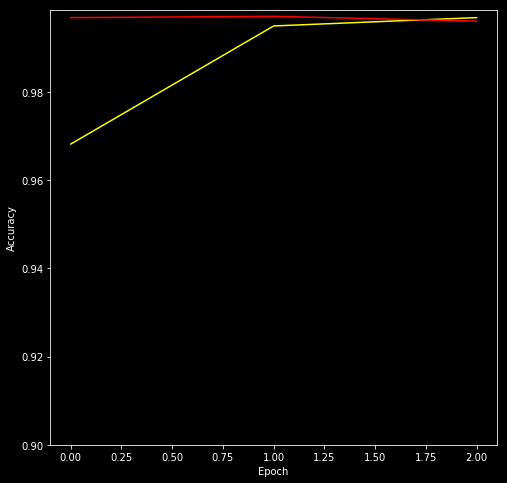

In [137]:
print(hist.history)
plt.style.use(['dark_background'])
plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], label='accuracy', color='yellow')
plt.plot(hist.history['val_accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(.90, 1, step=0.02))
plt.show()

In [139]:
#test data
filenames = test_data_generator.filenames
nb_samples = len(filenames)

evalu = model.evaluate_generator(test_data_generator)
print(model.metrics_names)
print("Accuracy : ")
print(evalu[1])


# probabilities = model.predict_generator(test_data_generator)
# print(probabilities)

['loss', 'accuracy']
Accuracy : 
0.99517906


In [144]:
print(test_data_generator.classes)
pred = model.predict_generator(test_data_generator)
y_pred = np.argmax(pred, axis=1)
print(y_pred)

[0 0 0 ... 5 5 5]
[0 0 0 ... 5 5 5]


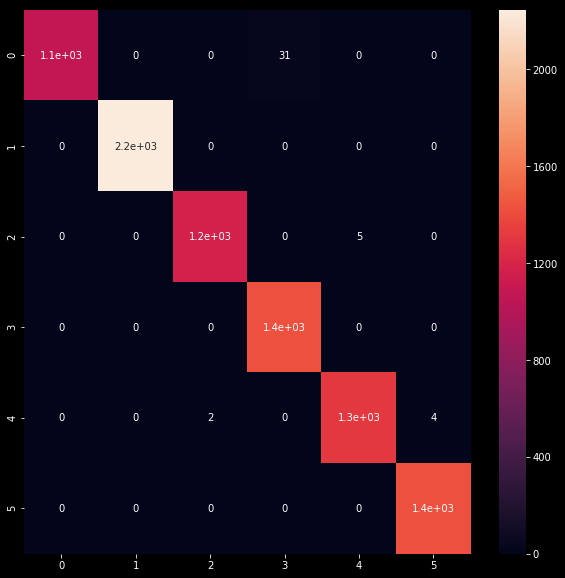

In [146]:
import seaborn as sns

cm = confusion_matrix(test_data_generator.classes, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)